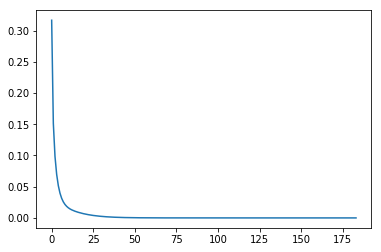

In [291]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

%matplotlib inline

# initialize the parameters
NumberOfLines = 186 
Epsilon = 0.05


Capa = [20,80,200,500,800]
C=len(Capa)
Fi = 1
Ci=1
Wf=0.5
Wcmax=0.5
deltaT=0.1
Q = np.zeros((2*C*NumberOfLines,2*C*NumberOfLines))
a1 =0.4
a2=0.1
a3=0.4
a4=.1

# begin loop to calculate the transition Matrix for given parameters
for i in range(1,NumberOfLines-1):
    # calculate the pStop
    if i<=int(a2*NumberOfLines):
        f1=Epsilon + a1*( (a2*NumberOfLines-i)/(a2*NumberOfLines) )**4
    elif i>int(a2*NumberOfLines) and i<=int(0.5*NumberOfLines):
        f1=Epsilon
    elif i>int(0.6*NumberOfLines):
        pstop_temp = Epsilon + ( (i-0.6*NumberOfLines)/(NumberOfLines-0.6*NumberOfLines))**4
        f1=min(1,pstop_temp)
    for j in [0,1]:
        if j==1:
            for k in range (0,C):
                pstop_cmax = a3*( (Capa[k]-max(Capa))/max(Capa) )**4
                f2 = max(a4, pstop_cmax)
                pStable = Wf*f1+Wcmax*f2
                if pStable>1:
                    pStable ==1
                #pCont probability
                pCont = 1 -pStable
                Q[ 2*(i-1)*C+2*(k-1)+j, 2*(i-1)*C+2*(k-1)+j+1]=pStable;
                # find the transition probabilities when there are new failures
                if k==1:
                    pContSub=min(1,0.03+6e-7*(i+112)**3);
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==2:
                    pContSub=min(1,0.03+6e-7*(i+75)**3);
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==3:
                    pContSub=min(1,0.03+6e-7*(i+20)**3);
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==4:
                    pContSub=min(1,0.03+6e-7*(i-60)**3);
                    if pContSub<0.03:
                        pContSub=0.03
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==5:
                    pContSub=0;
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                a=2.22
                b=1.52
                c=0.52
                d=0.03
                w=[a,b, c, d]
                if k==1:
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*w[0]/sum(w)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+5]= pContSub*pCont*w[1]/sum(w)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+7]= pContSub*pCont*w[2]/sum(w)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+9]= pContSub*pCont*w[3]/sum(w)
                if k==2:
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*w[1]/(sum(w)-w[0])
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+5]= pContSub*pCont*w[2]/(sum(w)-w[0])
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+7]= pContSub*pCont*w[3]/(sum(w)-w[0])
                if k==3:
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*w[2]/(sum(w)-w[0]-w[1])
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+5]= pContSub*pCont*w[3]/(sum(w)-w[0]-w[1])
                if k==4:
                            Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*1;


Q[2*(NumberOfLines-1)*C+1:2*C*NumberOfLines,:]=0
size = 2*NumberOfLines*C
for i in range (1,size):
            Q[i,i]=-1*sum(Q[i,:])
Q=Q/deltaT;

# Analytical result

[D,V] = LA.eig(Q);
U= np.diag(V)

M=0
ii=2*C*(Fi-1)+2*Ci-1
Dist = np.zeros(NumberOfLines+2)
for j in range (0,size,2):
            if U[j].all()!=0:
                temp=V[ii,j]/U[j]
                Dist[M,]=Dist[M,]+temp;
            
            if j%(2*C)==0:
                M=M+1;
            

# plot the distribution of the blackout size

plt.plot(Dist[1:185]) # 'r' is the color red
plt.show()